In [2]:
import yfinance as yf

In [3]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

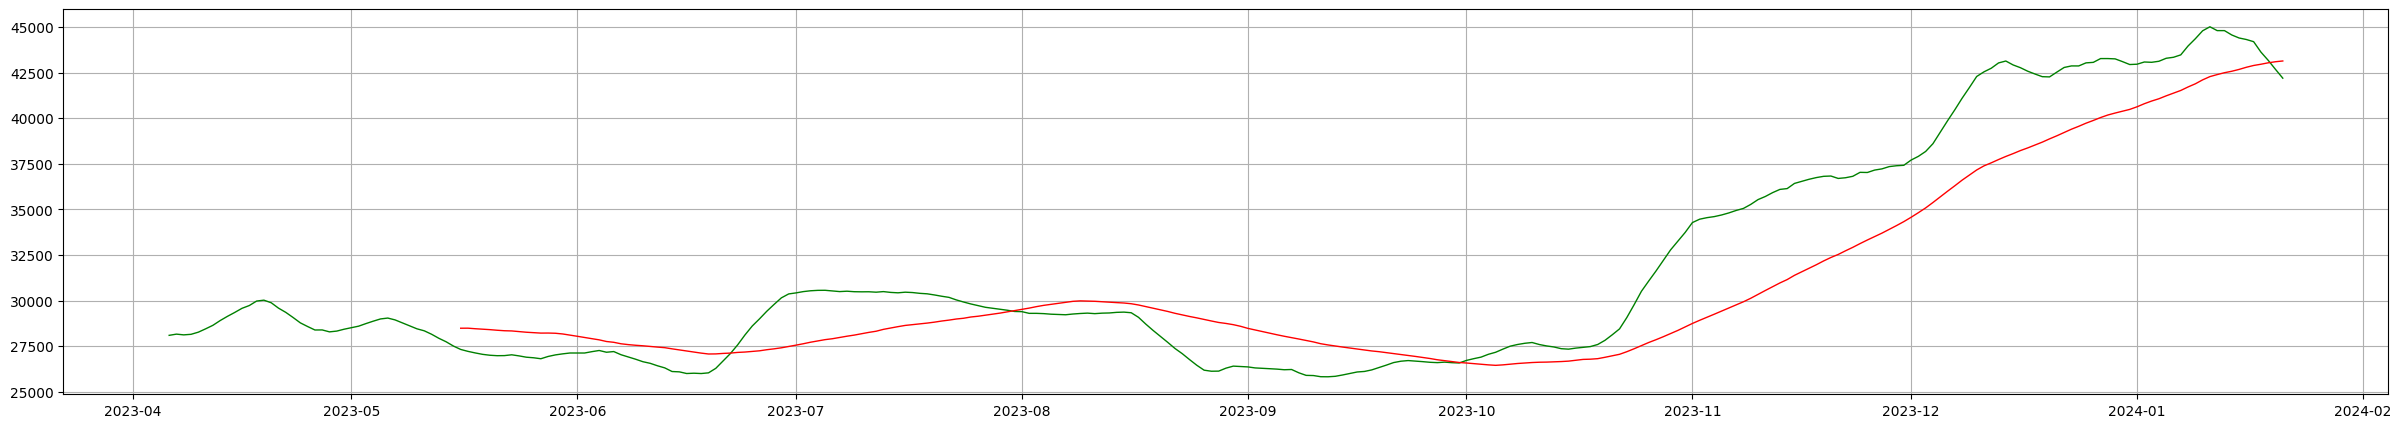

In [5]:
from algo_trader.lib.indicators.sma import SMA

df = data.iloc[-300:]
sma = SMA(10, 50)
sma.calculate(df)
sma.plot()

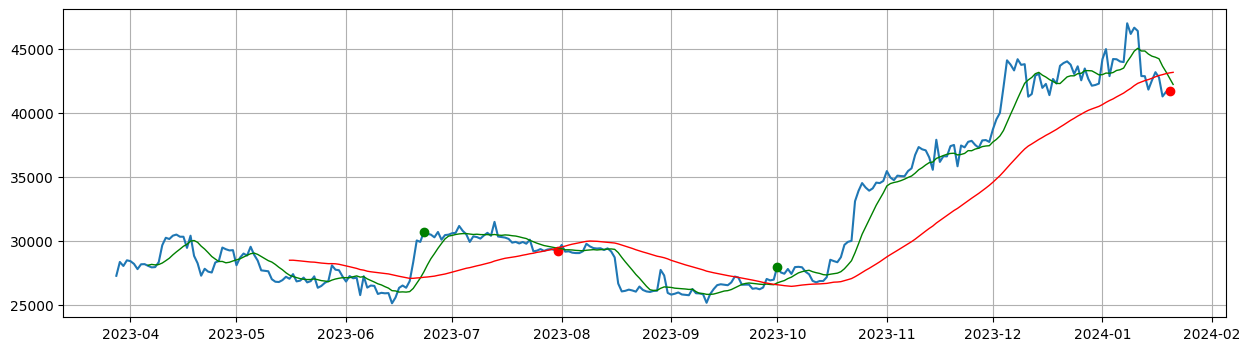

In [17]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,4), nrows=1, gridspec_kw={'height_ratios' : [1]})

sma_df = sma.calculate(df)
sma_df['buy_signal'] = sma.calc_buy_signals()
sma_df['sell_signal'] = sma.calc_sell_signals()
buySignals = sma_df[sma_df['buy_signal'] == True]
sellSignals = sma_df[sma_df['sell_signal'] == True]

ax.plot(sma_df.index, sma_df.Close)
ax.plot(buySignals.index, buySignals.Close, 'o', color='green')
ax.plot(sellSignals.index, sellSignals.Close, 'o', color='red')
ax.plot(sma_df.index, sma_df.FAST_SMA, color='green', linewidth=1)
ax.plot(sma_df.index, sma_df.SLOW_SMA, color='red', linewidth=1)
ax.grid()


In [18]:
new_record = data.iloc[-1:]
sma.predict_signal(new_record)

[SMA] Current fast SMA value: 42068.464453125
[SMA] Current slow SMA value: 43174.060390625
[SMA] Signal: Action.HOLD


<Action.HOLD: 'hold'>